## Data EDA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
file_path = "Jupyter Notebook/Hospital Readmission & LOS Analysis/data/diabetic_data_clean.csv"
df = pd.read_csv(file_path)

pd.set_option('display.max_columns', None)
print("Shape:", df.shape)
df.head()

Shape: (101766, 49)


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary,age_clean
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,Diabetes,Other,Other,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0,5
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,Endocrine/Metabolic,Diabetes,Endocrine/Metabolic,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,0,15
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,Other,Diabetes,Other,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0,25
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,Infectious,Diabetes,Circulatory,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0,35
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0,45


### Core KPI

In [6]:
# 30 days readmission rate
readmit_rate = (df['readmitted_binary'] == 1).mean()
print(f"30-day Readmission Rate: {readmit_rate:.2%}")

# Average LOS (Length of Stay)
avg_los = df['time_in_hospital'].mean()
print(f"Average Length of Stay (LOS): {avg_los:.2f} days")

30-day Readmission Rate: 11.16%
Average Length of Stay (LOS): 4.40 days


### Distribution analysis

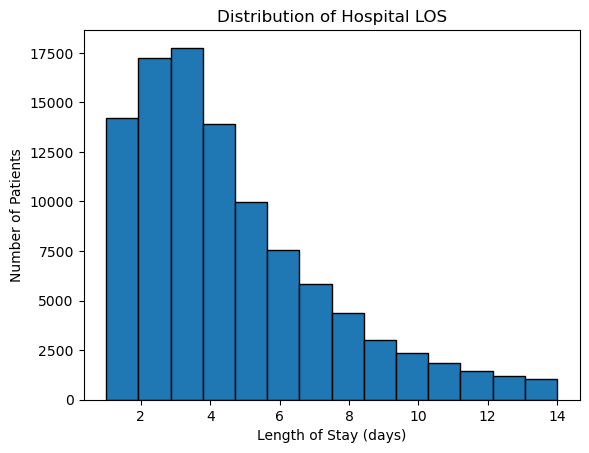

In [7]:
# LOS Distribution
plt.hist(df['time_in_hospital'], bins=14, edgecolor='black')
plt.xlabel("Length of Stay (days)")
plt.ylabel("Number of Patients")
plt.title("Distribution of Hospital LOS")
plt.show()


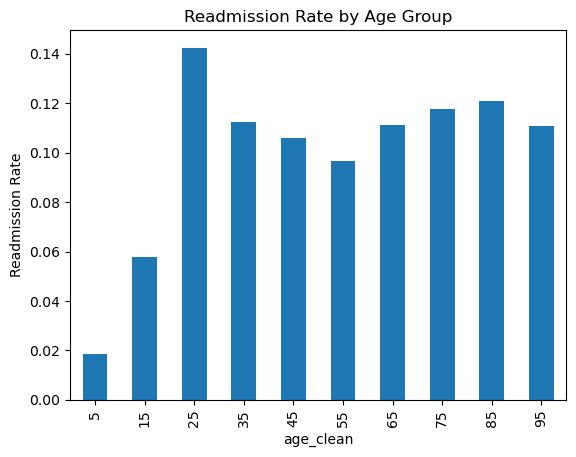

In [9]:
# age vs readmission rate
age_readmit = df.groupby('age_clean')['readmitted_binary'].mean()

age_readmit.plot(kind='bar')
plt.ylabel("Readmission Rate")
plt.title("Readmission Rate by Age Group")
plt.show()

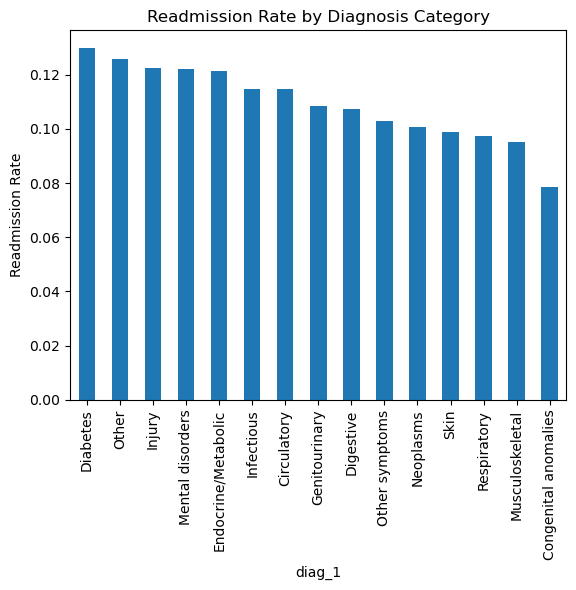

In [10]:
# Diagnosis categories vs readmission rate
diag_readmit = df.groupby('diag_1')['readmitted_binary'].mean().sort_values(ascending=False)

diag_readmit.plot(kind='bar')
plt.ylabel("Readmission Rate")
plt.title("Readmission Rate by Diagnosis Category")
plt.show()

### Stratified KPI

In [12]:
# High-risk cohorts identification

high_risk = df[(df['age_clean'] > 70) & (df['number_diagnoses'] > 8)]
rate_high_risk = (high_risk['readmitted_binary']).mean()
print(f"Readmission Rate for High-Risk Cohort: {rate_high_risk:.2%}")

Readmission Rate for High-Risk Cohort: 12.18%


In [13]:
# Prior admissions

prior_admit = df[df['number_inpatient'] > 2]
rate_prior = (prior_admit['readmitted_binary']).mean()
print(f"Readmission Rate for Patients with >2 Prior Admissions: {rate_prior:.2%}")

Readmission Rate for Patients with >2 Prior Admissions: 25.66%


In [14]:
# Correlation matrix
corr = df[['time_in_hospital','num_lab_procedures','num_medications',
           'number_inpatient','number_emergency','number_outpatient',
           'number_diagnoses','readmitted_binary']].corr()

print(corr['readmitted_binary'].sort_values(ascending=False))

readmitted_binary     1.000000
number_inpatient      0.165147
number_emergency      0.060747
number_diagnoses      0.049524
time_in_hospital      0.044199
num_medications       0.038432
num_lab_procedures    0.020364
number_outpatient     0.018893
Name: readmitted_binary, dtype: float64


#### **Insight:** Utilization history (inpatient count) is far more predictive than raw LOS or lab volume.

## EDA Insight Summary

**Overall readmission rate ~11%, average LOS ~4.4 days.**

**High-risk groups:**

- Younger diabetics (20–30) → highest readmission (possible poor adherence).

- Elderly with multiple comorbidities (≥70, >8 diagnoses).

- Patients with ≥2 prior inpatient stays (25.6% readmission).

**Diagnosis patterns:** Diabetes, injury, mental disorders → highest readmission risk.

**Operational implication:**

- Target frequent utilizers (multiple prior admissions) with special care programs.

- Focus on chronic disease management (diabetes, circulatory, mental health).

- Improve discharge planning for 20–30 age group diabetics (education, follow-up).